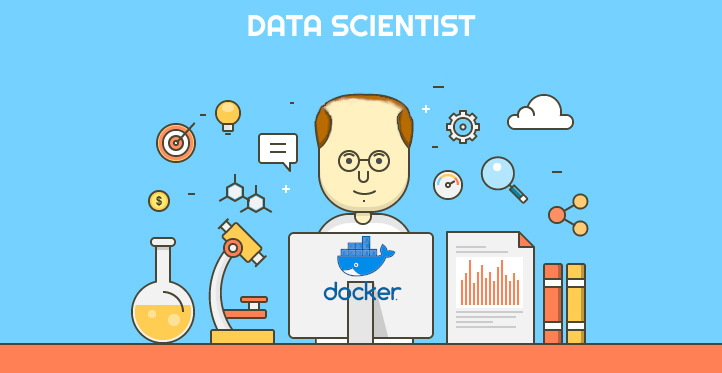

# PCA e t-SNE
Atualmente a maioria dos conjuntos de dados tem um grande número de variáveis. Em outras palavras, possuem um alto número de dimensões ao longo das quais os dados são distribuídos. A exploração visual dos dados pode se tornar um desafio e, na maioria das vezes, praticamente impossível de fazer manualmente. No entanto, essa exploração visual é incrivelmente importante em qualquer problema relacionado a dados.

In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import time
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

%matplotlib inline

Como estaremos trabalhando com muitas informações o ideal é criarmos uma palheta de cores para os gráficos bem esparçada.

In [2]:
# Palheta de Cores para os gráficos
top = cm.get_cmap('Oranges_r', 128)
bottom = cm.get_cmap('Blues', 128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

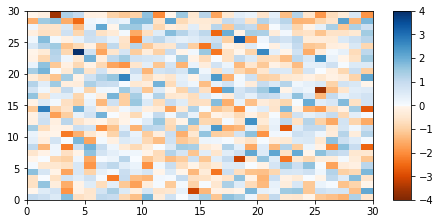

In [3]:
# Teste da Palheta de Cores
np.random.seed(19680801)
data = np.random.randn(30, 30)
fig, ax = plt.subplots(1, 1, figsize=(6, 3), constrained_layout=True)
psm = ax.pcolormesh(data, cmap=newcmp, rasterized=True, vmin=-4, vmax=4)
fig.colorbar(psm, ax=ax)
plt.show()

Observamos como leva um tempo considerado para realizar a leitura dos dados.

In [40]:
mnist = fetch_openml('mnist_784')
X = mnist.data
y = mnist.target
print(X.shape, y.shape)

(70000, 784) (70000,)


Assim vamos converter a matriz e o vetor em um DataFrame do Pandas.

In [41]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
del(X)
del(y)
print('Tamanho do DataFrame: {}'.format(df.shape))
df.head()

Tamanho do DataFrame: (70000, 786)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,9


Para não usar 70.000 dígitos em alguns cálculos (o que pode pesar e muito a máquina), pegaremos um subconjunto aleatório dos dígitos. A randomização é importante, pois o conjunto de dados é classificado por seu rótulo (ou seja, os primeiros sete mil mais ou menos são zeros). Para garantir a randomização, criaremos uma permutação aleatória do número 0 a 69.999, que nos permitirá selecionar posteriormente os cinco ou dez mil primeiros para nossos cálculos e visualizações.

In [6]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
print(rndperm)

[46730 48393 41416 ... 54886   860 15795]


Mostrar as 15 primeiras imagens dos dados.

<Figure size 432x288 with 0 Axes>

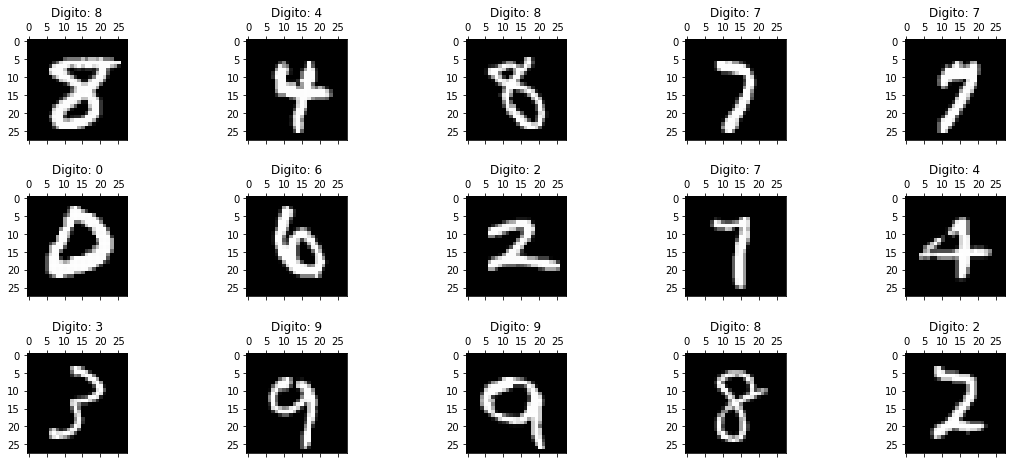

In [7]:
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digito: {}".format(str(df.loc[rndperm[i],'label'])))
    fig.tight_layout(pad=2.0)
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [8]:
# Criar um subconjunto com 10.000 linhas
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
len(data_subset)

10000

## PCA - Principal Component Analysis

In [14]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_subset)
df_subset['PCA X'] = pca_result[:,0]
df_subset['PCA Y'] = pca_result[:,1] 
print('Variação explicada do componente principal: {}'.format(pca.explained_variance_ratio_))

Variação explicada do componente principal: [0.15959947 0.11577999 0.09935569]


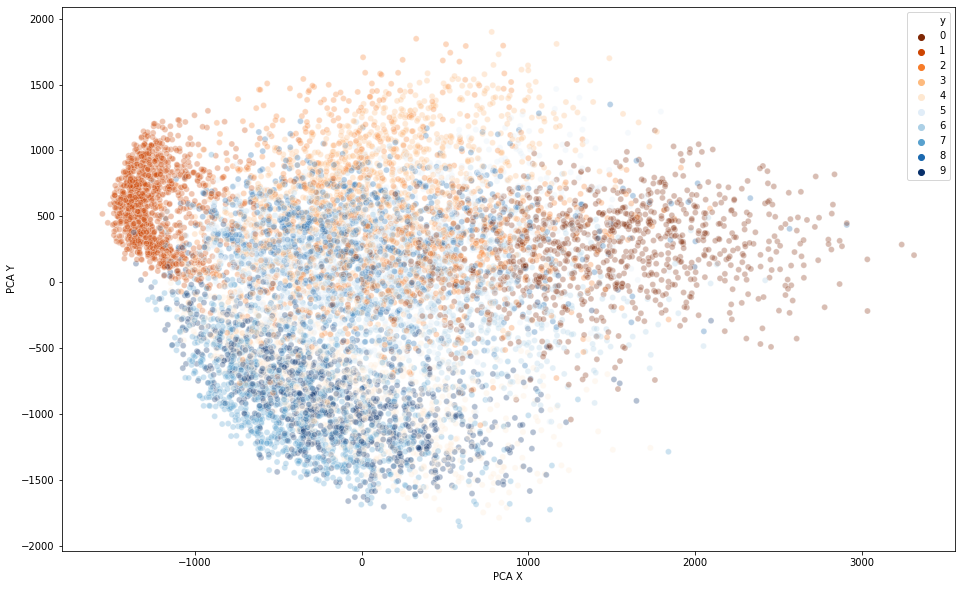

In [15]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="PCA X", y="PCA Y",
    hue="y",
    palette=newcmp,
    data=df_subset,
    legend="full",
    alpha=0.3
)

Visão tridimensional do mesmo gráfico:

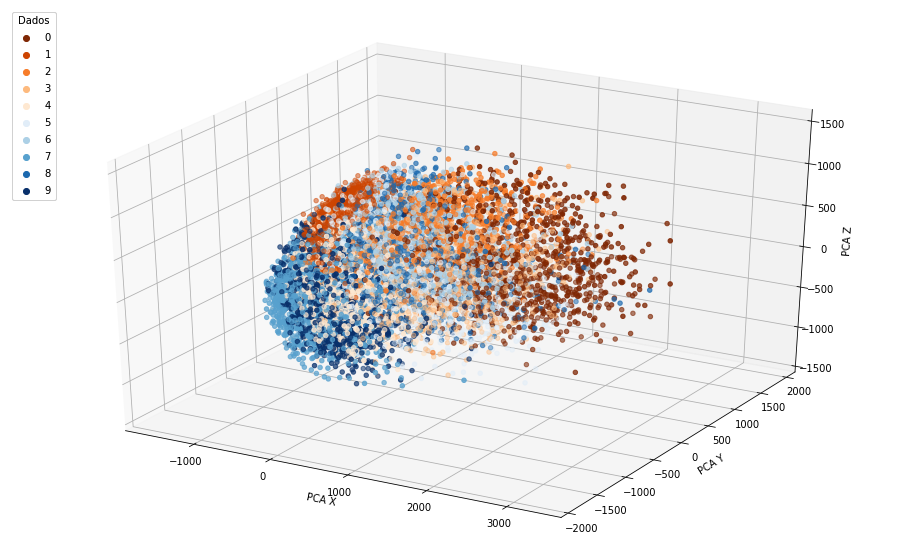

In [16]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
scatter = ax.scatter(
    xs=df_subset["PCA X"].astype(int), 
    ys=df_subset["PCA Y"].astype(int), 
    zs=df_subset["PCA Z"].astype(int), 
    c=df_subset["y"].astype(int),
    cmap=newcmp
)
legend1 = ax.legend(*scatter.legend_elements(num=10),
                    loc="upper left", title="Dados")
ax.add_artist(legend1)
ax.set_xlabel('PCA X')
ax.set_ylabel('PCA Y')
ax.set_zlabel('PCA Z')
plt.show()

No gráfico, podemos ver que os dois componentes contêm definitivamente algumas informações, especialmente para dígitos específicos, mas claramente não o suficiente para separá-las. Felizmente, existe outra técnica que podemos usar para reduzir o número de dimensões que podem ser mais úteis.

## tSNE - t-Distributed Stochastic Neighbouring Entities

In [17]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE pronto! Tempo decorrido'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.636s...
[t-SNE] Computed neighbors for 10000 samples in 174.457s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 438.329018
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.149155
[t-SNE] KL divergence after 300 iterations: 2.826627
t-SNE done! Time elap

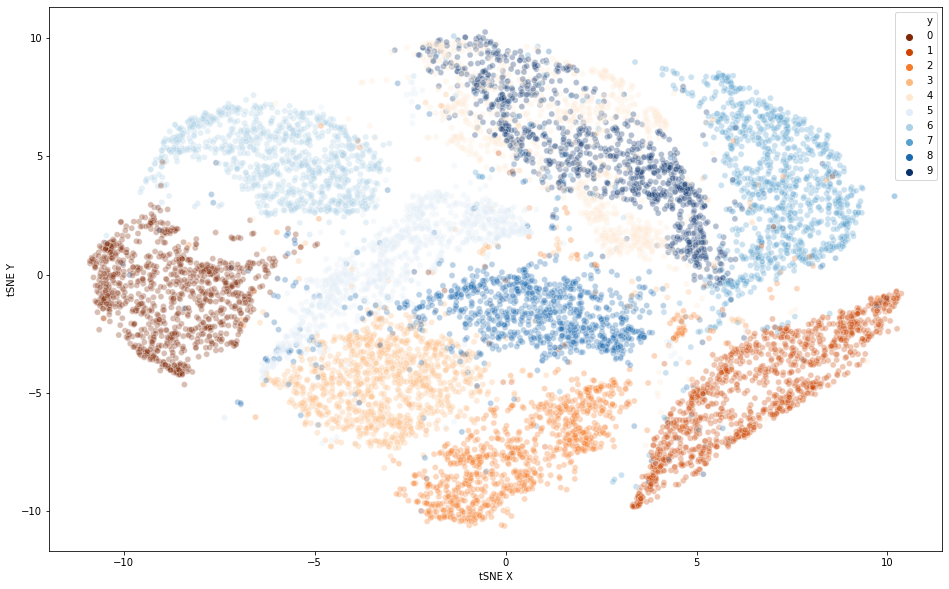

In [18]:
df_subset['tSNE X'] = tsne_results[:,0]
df_subset['tSNE Y'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tSNE X", y="tSNE Y",
    hue="y",
    palette=newcmp,
    data=df_subset,
    legend="full",
    alpha=0.3
)

## Utilizando os Modelos em Conjunto

1. Usamos a PCA para obter uma variação de 50 principais componentes dentro do modelo

In [22]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)
df_subset['PCA 50 X'] = pca_result_50[:,0]
df_subset['PCA 50 Y'] = pca_result_50[:,1] 
print('Variação explicada acumulativa para 50 componentes principais: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Variação explicada acumulativa para 50 componentes principais: 0.8261636057790263


2. Rodamos o modelo tSNE com base nesse resultado (vejamos como cairá o tempo)

In [21]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE pronto! Tempo decorrido: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.025s...
[t-SNE] Computed neighbors for 10000 samples in 13.366s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 354.752621
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.998856
[t-SNE] KL divergence after 300 iterations: 2.808887
t-SNE pronto! Tempo de

Comparando os Gráficos

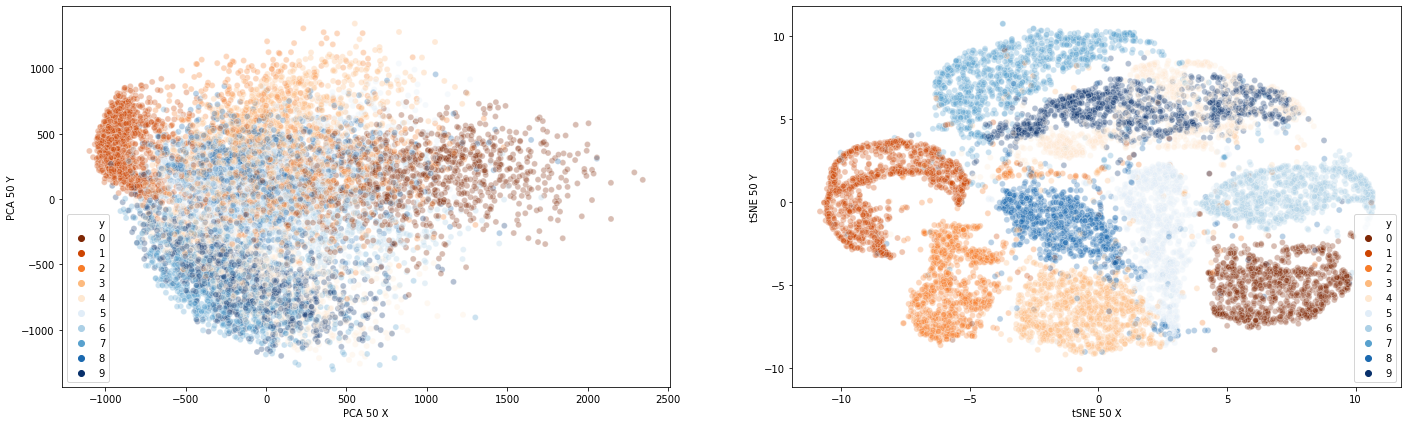

In [38]:
df_subset['tSNE 50 X'] = tsne_pca_results[:,0]
df_subset['tSNE 50 Y'] = tsne_pca_results[:,1]

plt.figure(figsize=(24,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="PCA 50 X", y="PCA 50 Y",
    hue="y",
    palette=newcmp,
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tSNE 50 X", y="tSNE 50 Y",
    hue="y",
    palette=newcmp,
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)